In [20]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [3]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

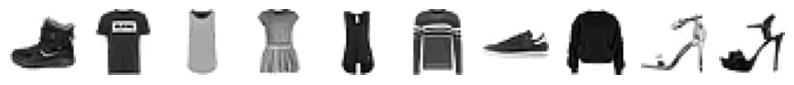

In [4]:
import matplotlib.pyplot as plt

fig,axs = plt.subplots(1,10,figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i],cmap='gray_r') # gray_r: 현재색반전  0  255
    axs[i].axis('off')                          # 그래프의 눈금을 제거
plt.show() 

In [5]:
train_input.shape

(60000, 28, 28)

In [6]:
# 표준화작업
train_scaled = train_input/255.0
# train_scaled = train_scaled.reshape(-1,28*28) # flatten층에서 사이즈 그대로 적용(28,28)

In [7]:
train_scaled,val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42
)

In [8]:
# 머신러닝
# 모델결정 model = keras.Sequential()
# Flatten 추가  model.add(keras.layers.Flatten(input_shape=(28,28)))
# Dense층 추가  model.add(keras.layers.Dense(100,activation='relu'))
# Dense층 추가  model.add(keras.layers.Dense(10,activation='softmax'))
# 모델구성확인  model.summary()
# 모델설정 옵티마이저 - adam
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 모델훈련 model.fit(train_scaled,train_target,batch_size=32,epochs=5)
# 모델평가 model.evaluate(val_scaled,val_target)


In [9]:
train_scaled.shape

(48000, 28, 28)

In [10]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu')) # sigmoid
model.add(keras.layers.Dense(10,activation='softmax'))

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

epochs = 20 훈련세트 정확도가 높아짐

검증세트를 가지고 정확도를 측정

In [23]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# epochs 돌때마 loss,accuracy 값을 저장
history = model.fit(train_scaled,train_target,epochs=20)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8909 - loss: 0.2868
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9004 - loss: 0.2753
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9059 - loss: 0.2613
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9092 - loss: 0.2474
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9104 - loss: 0.2383
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9131 - loss: 0.2335
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9116 - loss: 0.2325
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9179 - loss: 0.2214
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9215 - loss: 0.2114
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9244 - loss: 0.2033
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9228 - loss: 0.2050
Epoch 12/20
1500/1500 ━━━━━━━━

In [24]:
# history keys index를 확인
history.history.keys()

dict_keys(['accuracy', 'loss'])

In [29]:
history.history['loss']
history.history['accuracy']

[0.8931041955947876,
 0.8996041417121887,
 0.9040625095367432,
 0.9069374799728394,
 0.9090208411216736,
 0.9115625023841858,
 0.9132291674613953,
 0.917229175567627,
 0.9192916750907898,
 0.9224583506584167,
 0.9241666793823242,
 0.9253333210945129,
 0.9295416474342346,
 0.9298750162124634,
 0.9311666488647461,
 0.933020830154419,
 0.9351666569709778,
 0.9356250166893005,
 0.937833309173584,
 0.9399166703224182]

In [28]:
# train세트 검증데이터(loss,accuracy) 그래프 - history

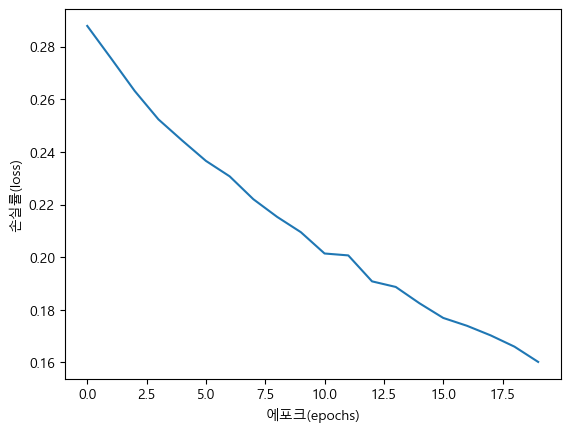

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('에포크(epochs)')
plt.ylabel('손실률(loss)')
# plt.savefig('m0529_03',dpi=300) # 파일저장
plt.show()

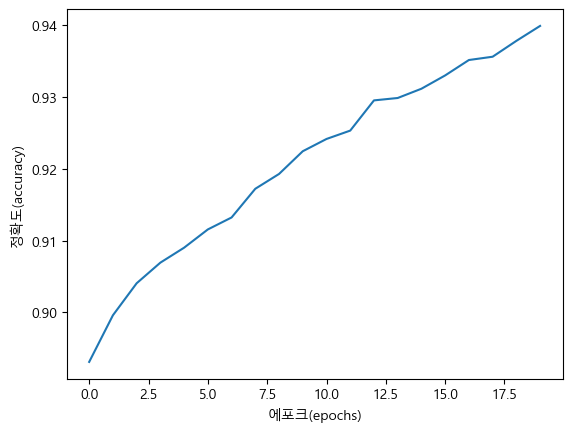

In [27]:
# 정확도 그래프
plt.plot(history.history['accuracy'])
plt.xlabel('에포크(epochs)')
plt.ylabel('정확도(accuracy)')
# plt.savefig('m0529_03',dpi=300) # 파일저장
plt.show()

검증세트도 함께 검증

In [ ]:
# model.fit - loss,accuracy정보를 리턴 (history)
# 검증 세트(test,val)도 함께 검증 - histroy정보로 받을수 있음.

In [30]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# epochs 돌때마 loss,accuracy 값을 저장
# train_scaled,val_scaled 함께 훈련시킴.
history = model.fit(train_scaled,train_target,epochs=20,
                    validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9408 - loss: 0.1560 - val_accuracy: 0.8895 - val_loss: 0.3630
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9432 - loss: 0.1495 - val_accuracy: 0.8883 - val_loss: 0.3863
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9445 - loss: 0.1495 - val_accuracy: 0.8909 - val_loss: 0.3573
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9459 - loss: 0.1444 - val_accuracy: 0.8887 - val_loss: 0.3812
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9474 - loss: 0.1386 - val_accuracy: 0.8918 - val_loss: 0.3713
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9499 - loss: 0.1355 - val_accuracy: 0.8846 - val_loss: 0.4091
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9499 - loss: 0.1324 - val_accuracy: 0.8916 - val_loss: 0.3893
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9500 - loss: 0.1348 - 

In [31]:
# 총4개 속성 - train세트 2개(accuyracy,loss) , test세트 2개(val_accuracy,val_loss)
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [33]:
history.history['loss']

[0.1588555872440338,
 0.1545914262533188,
 0.14982160925865173,
 0.1474761813879013,
 0.14165915548801422,
 0.13983312249183655,
 0.1391252726316452,
 0.13439495861530304,
 0.1332818567752838,
 0.1291930377483368,
 0.12708932161331177,
 0.12228161841630936,
 0.12349623441696167,
 0.1197701022028923,
 0.11691629886627197,
 0.11694762855768204,
 0.11203911155462265,
 0.11148649454116821,
 0.10937605798244476,
 0.10847669839859009]

In [34]:
history.history['val_loss']

[0.3629785478115082,
 0.38628894090652466,
 0.35734400153160095,
 0.38117632269859314,
 0.3713357448577881,
 0.40910661220550537,
 0.3893193304538727,
 0.39100873470306396,
 0.38988879323005676,
 0.394807904958725,
 0.41098278760910034,
 0.43767672777175903,
 0.4230087101459503,
 0.4398896396160126,
 0.4268898665904999,
 0.42447009682655334,
 0.44421088695526123,
 0.47129741311073303,
 0.4535463750362396,
 0.4670166075229645]

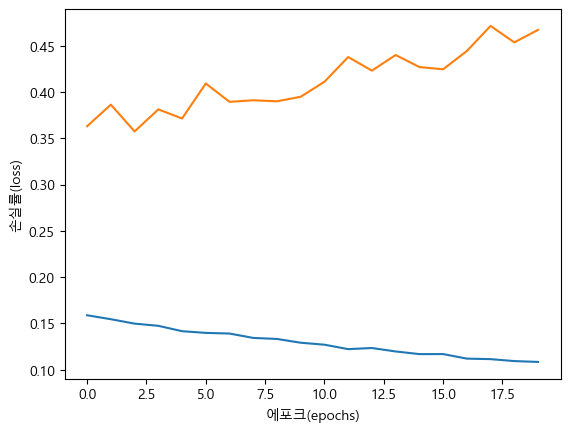

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('에포크(epochs)')
plt.ylabel('손실률(loss)')
# plt.savefig('m0529_03',dpi=300) # 파일저장
plt.show()

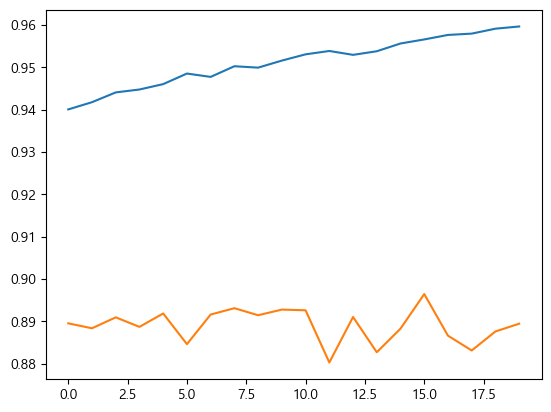

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [13]:
model.evaluate(val_scaled,val_target) #test데이터를 가지고 검증

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.8827 - loss: 0.3278


[0.33099478483200073, 0.8805000185966492]

In [14]:
# 패션mlist 딥러닝을 구현하시오.


# 변경
# 모델결정 model = keras.Sequential()
# Flatten 추가  model.add(keras.layers.Flatten(input_shape=(28,28)))
# Dense층 추가  model.add(keras.layers.Dense(100,activation='relu'))
# Dense층 추가  model.add(keras.layers.Dense(10,activation='softmax'))
# 모델설정 옵티마이저 - adam
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 모델훈련 model.fit(train_scaled,train_target,batch_size=32,epochs=5)
# 모델평가 model.evaluate(val_scaled,val_target)